<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('C:/Users/AUCLAIR/Documents/Projet_Data_4/population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('C:/Users/AUCLAIR/Documents/Projet_Data_4/dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('C:/Users/AUCLAIR/Documents/Projet_Data_4/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('C:/Users/AUCLAIR/Documents/Projet_Data_4/sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
print(population.shape[1])

3


In [5]:
#La nature des données dans chacune des colonnes
print(population.dtypes)

Zone       object
Année       int64
Valeur    float64
dtype: object


In [6]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(population.count())

Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [7]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [8]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur'] * 1000

In [9]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})

In [10]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [11]:
# Vérification des valeurs manquantes
population.isna().sum()

Zone          0
Année         0
Population    0
dtype: int64

In [12]:
# Vérification des doublons
doublons_population = population[population.duplicated(subset=["Zone", "Année"], keep=False)]
print(doublons_population)

Empty DataFrame
Columns: [Zone, Année, Population]
Index: []


In [13]:
# J'estime que la clé primaire est l'association de "Zone" et "Année"
#Il n'y a pas de valeur manquantes, pas de doublons

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [14]:
#Afficher les dimensions du dataset
dispo_alimentaire.shape

(15605, 18)

In [15]:
#Consulter le nombre de colonnes
dispo_alimentaire.shape[1]

18

In [16]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [17]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire.iloc[:, 3:5] =  dispo_alimentaire.iloc[:, 3:5]* 1_000_000
dispo_alimentaire.iloc[:, 9:19] =  dispo_alimentaire.iloc[:, 9:19]* 1_000_000

In [18]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [19]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Vérification des doublons
doublons_dispo = dispo_alimentaire[dispo_alimentaire.duplicated(subset=["Zone", "Produit"])]
print(doublons_dispo)

Empty DataFrame
Columns: [Zone, Produit, Origine, Aliments pour animaux, Autres Utilisations, Disponibilité alimentaire (Kcal/personne/jour), Disponibilité alimentaire en quantité (kg/personne/an), Disponibilité de matière grasse en quantité (g/personne/jour), Disponibilité de protéines en quantité (g/personne/jour), Disponibilité intérieure, Exportations - Quantité, Importations - Quantité, Nourriture, Pertes, Production, Semences, Traitement, Variation de stock]
Index: []


In [21]:
# Je considère en clé primaire "Zone" avec "Produit"
# Il n'y a aucun doublons pour cette clé, les NAN ont été remplacé par 0

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [22]:
#Afficher les dimensions du dataset
aide_alimentaire.shape

(1475, 4)

In [23]:
#Consulter le nombre de colonnes
aide_alimentaire.shape[1]

4

In [24]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [25]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={"Pays bénéficiaire" :"Zone"})

In [26]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000000

In [27]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000000
1,Afghanistan,2014,Autres non-céréales,335000000
2,Afghanistan,2013,Blé et Farin,39224000000
3,Afghanistan,2014,Blé et Farin,15160000000
4,Afghanistan,2013,Céréales,40504000000


In [28]:
# Vérification des doublons
doublons_aide = aide_alimentaire[aide_alimentaire.duplicated(subset=["Zone", "Année", "Produit"])]
print(doublons_aide)

Empty DataFrame
Columns: [Zone, Année, Produit, Valeur]
Index: []


In [29]:
# Vérification des valeurs manquantes
aide_alimentaire.isna().sum()

Zone       0
Année      0
Produit    0
Valeur     0
dtype: int64

In [30]:
# J'estime que la clé primaire est l'association de "Zone"/  "Année" / "Produit"
#Il n'y a pas de valeur manquantes, pas de doublons

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [31]:
#Afficher les dimensions du dataset
sous_nutrition.shape

(1218, 3)

In [32]:
#Consulter le nombre de colonnes
sous_nutrition.shape[1]

3

In [33]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [34]:
#Conversion de la colonne sous nutrition en numérique


In [35]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition.fillna(0, inplace = True)
sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [36]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={"Valeur" : "sous_nutrition"})

In [37]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"] * 1000000

In [38]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


In [39]:
# Vérification des doublons
doublons_sous_nutrition = sous_nutrition[sous_nutrition.duplicated(subset=["Zone", "Année"])]
print(doublons_sous_nutrition)

Empty DataFrame
Columns: [Zone, Année, sous_nutrition]
Index: []


In [40]:
# Vérification des valeurs manquantes
sous_nutrition.isna().sum()

Zone              0
Année             0
sous_nutrition    0
dtype: int64

In [41]:
# Il n'y a pas de valeurs manquantes, et pas de boublons en considérant la clé primaire "Zone" avec "Année"	

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [42]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population_2017 = population[population["Année"] == 2017]
sous_nutrition_2017 = sous_nutrition.copy()
sous_nutrition_2017['Année'] = sous_nutrition['Année'].str.replace("2016-2018", "2017")
sous_nutrition_2017 = sous_nutrition_2017[sous_nutrition_2017['Année'] == "2017"]
sous_nutrition_2017['Année'] = sous_nutrition_2017['Année'].astype(int)
data_SN_2017 = pd.merge(sous_nutrition_2017, population_2017,  on=['Zone', 'Année'] ,how='left')

In [43]:
#Affichage du dataset
print(data_SN_2017)

                                       Zone  Année  sous_nutrition  Population
0                               Afghanistan   2017      10500000.0  36296113.0
1                            Afrique du Sud   2017       3100000.0  57009756.0
2                                   Albanie   2017        100000.0   2884169.0
3                                   Algérie   2017       1300000.0  41389189.0
4                                 Allemagne   2017             0.0  82658409.0
..                                      ...    ...             ...         ...
198  Venezuela (République bolivarienne du)   2017       8000000.0  29402484.0
199                                Viet Nam   2017       6500000.0  94600648.0
200                                   Yémen   2017             0.0  27834819.0
201                                  Zambie   2017             0.0  16853599.0
202                                Zimbabwe   2017             0.0  14236595.0

[203 rows x 4 columns]


In [44]:
# Vérification des valeurs manquantes
data_SN_2017.isna().sum()

Zone              0
Année             0
sous_nutrition    0
Population        0
dtype: int64

In [45]:
# Vérification des doublons
doublons_data_SN_2017= data_SN_2017[data_SN_2017.duplicated(subset=["Zone", "Année"])]
print(doublons_data_SN_2017)

Empty DataFrame
Columns: [Zone, Année, sous_nutrition, Population]
Index: []


In [46]:
len(population_2017), len(sous_nutrition_2017)

(236, 203)

In [47]:
# Etude des pays manquants dans la fusion
Pays_population_2017 = population_2017['Zone'].unique()
Pays_sous_nutrition_2017 = sous_nutrition_2017['Zone'].unique()
ensemble_population = set(Pays_population_2017)
ensemble_sous_nutrition = set(Pays_sous_nutrition_2017)

# Pays présents dans population mais absents dans sous_nutrition
pays_manquants = ensemble_population - ensemble_sous_nutrition

# Affichage des pays manquants
print("Pays présents dans population_2017 mais absents de sous_nutrition_2017 :")
for pays in sorted(pays_manquants):
    print(pays)

Pays présents dans population_2017 mais absents de sous_nutrition_2017 :
Anguilla
Antilles néerlandaises (ex)
Aruba
Bonaire, Saint-Eustache et Saba
Curaçao
Gibraltar
Guadeloupe
Guam
Guyane française
Liechtenstein
Martinique
Mayotte
Monaco
Montserrat
Réunion
Sahara occidental
Saint-Barthélemy
Saint-Marin
Saint-Martin (partie française)
Saint-Pierre-et-Miquelon
Saint-Siège
Sainte-Hélène, Ascension et Tristan da Cunha
Sint Maarten  (partie néerlandaise)
Île de Man
Îles Anglo-Normandes
Îles Caïmanes
Îles Falkland (Malvinas)
Îles Féroé
Îles Mariannes du Nord
Îles Turques-et-Caïques
Îles Vierges américaines
Îles Vierges britanniques
Îles Wallis-et-Futuna


In [48]:
#Les pays non souverains/à statut particulier ne sont plus présents

In [49]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
print("Population mondiale en sous nutrition :" ,data_SN_2017['sous_nutrition'].sum())

Population mondiale en sous nutrition : 535700000.0


In [50]:
print("Population mondiale en 2017 :", data_SN_2017['Population'].sum())

Population mondiale en 2017 : 7543798779.0


In [51]:
print( "Proportion de Population mondiale en sous nutrition en 2017 :", round((data_SN_2017['sous_nutrition'].sum()/data_SN_2017['Population'].sum()) *100, 3), "%")

Proportion de Population mondiale en sous nutrition en 2017 : 7.101 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [52]:
#Combien mange en moyenne un être humain ? Source => 
calories = 2150

In [53]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
Data_dispo = dispo_alimentaire.merge(population_2017[['Zone', 'Population']], on ='Zone', how='left')

In [54]:
#Affichage du nouveau dataframe
print(Data_dispo)

               Zone                Produit   Origine  Aliments pour animaux  \
0       Afghanistan       Abats Comestible   animale                    0.0   
1       Afghanistan        Agrumes, Autres  vegetale                    0.0   
2       Afghanistan  Aliments pour enfants  vegetale                    0.0   
3       Afghanistan                 Ananas  vegetale                    0.0   
4       Afghanistan                Bananes  vegetale                    0.0   
...             ...                    ...       ...                    ...   
15600  Îles Salomon       Viande de Suides   animale                    0.0   
15601  Îles Salomon    Viande de Volailles   animale                    0.0   
15602  Îles Salomon          Viande, Autre   animale                    0.0   
15603  Îles Salomon                    Vin  vegetale                    0.0   
15604  Îles Salomon         Épices, Autres  vegetale                    0.0   

       Autres Utilisations  Disponibilité alimentai

In [55]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
Data_dispo['dispo_kcal'] = Data_dispo['Disponibilité alimentaire (Kcal/personne/jour)'] * Data_dispo['Population']
Data_dispo['dispo_kcal']

0        181480565.0
1         36296113.0
2         36296113.0
3                0.0
4        145184452.0
            ...     
15600     28621755.0
15601      6996429.0
15602            0.0
15603            0.0
15604      2544156.0
Name: dispo_kcal, Length: 15605, dtype: float64

In [56]:
#Somme mondiale des kcal disponibles par jour
total_Kcal_par_jour = Data_dispo['dispo_kcal'].sum()
print(total_Kcal_par_jour)

20918984627331.0


In [57]:
#Calcul du nombre d'humains pouvant être nourris
Nombre_humain_nourri = round(total_Kcal_par_jour / calories)
print("Le nombre d'humain pouvant être nourris théoriquement :", Nombre_humain_nourri)

Le nombre d'humain pouvant être nourris théoriquement : 9729760292


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [58]:
Data_dispo['Origine'].value_counts()

Origine
vegetale    11896
animale      3709
Name: count, dtype: int64

In [59]:
#Transfert des données avec les végétaux dans un nouveau dataframe
data_vegetaux = Data_dispo[Data_dispo['Origine'] == 'vegetale']

In [60]:
data_ani = Data_dispo[Data_dispo['Origine'] == 'animale']
print(data_ani['dispo_kcal'].sum())

3658220415830.0


In [61]:
#Calcul du nombre de kcal disponible pour les végétaux
total_Kcal_vegetaux = data_vegetaux['dispo_kcal'].sum()

In [62]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
print("Le nombre d'humain pouvant être nourris théoriquement avec uniquement des végétaux:", total_Kcal_vegetaux/calories)

Le nombre d'humain pouvant être nourris théoriquement avec uniquement des végétaux: 8028262423.953954


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [63]:
#Calcul de la disponibilité totale
print("Disponibilité totale :" ,Data_dispo['Disponibilité intérieure'].sum(), " kg")

Disponibilité totale : 9848994000000.0  kg


In [64]:
#Calcul de la disponibilité totale avec la formule
Data_dispo['Dispo_totale'] = Data_dispo['Production'] + Data_dispo['Importations - Quantité'] - Data_dispo['Exportations - Quantité'] - Data_dispo['Variation de stock']
print("Disponibilité totale avec formule :", Data_dispo['Dispo_totale'].sum(), " kg")

Disponibilité totale avec formule : 10057977000000.0  kg


In [65]:
#Calcul de l'écart de de la disponibilité
print(round((Data_dispo['Dispo_totale'].sum()-Data_dispo['Disponibilité intérieure'].sum()) / Data_dispo['Disponibilité intérieure'].sum()*100), "% d'écart entre les 2 valeurs")

2 % d'écart entre les 2 valeurs


In [66]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
liste = ['Aliments pour animaux', 'Pertes', 'Nourriture']
for i in liste:
    print( i, ":", Data_dispo[i].sum())

Aliments pour animaux : 1304245000000.0
Pertes : 453698000000.0
Nourriture : 4876258000000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [67]:
#Création d'une liste avec toutes les variables
liste_cereales = ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maîs', 'Seigle', 'Avoine', 'Millet','Sorgho', 'Céréales, Autres']

In [68]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
data_cereales = Data_dispo[Data_dispo['Produit'].isin(liste_cereales)]

In [69]:
#Affichage de la proportion d'alimentation animale
Proportion_animale = data_cereales['Aliments pour animaux'].sum() /data_cereales['Disponibilité intérieure'].sum() * 100
print("Proportion d'alimentation animale :",Proportion_animale, "%")

Proportion d'alimentation animale : 22.561948732083792 %


In [70]:
#Affichage de la proportion d'alimentation animale
dispo_alimentaire['Aliments pour animaux'].sum(), dispo_alimentaire['Disponibilité intérieure'].sum()

(np.float64(1304245000000.0), np.float64(9848994000000.0))

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [71]:
#Création de la colonne proportion par pays
data_SN_2017['proportion_en_%'] = (data_SN_2017['sous_nutrition'] / data_SN_2017['Population']) * 100
data_SN_2017

,Zone,Année,sous_nutrition,Population,proportion_en_%
0,Afghanistan,2017,10500000.0,36296113.0,28.928718
1,Afrique du Sud,2017,3100000.0,57009756.0,5.437666
2,Albanie,2017,100000.0,2884169.0,3.467203
3,Algérie,2017,1300000.0,41389189.0,3.140917
4,Allemagne,2017,0.0,82658409.0,0.000000
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8000000.0,29402484.0,27.208586
199,Viet Nam,2017,6500000.0,94600648.0,6.870989
200,Yémen,2017,0.0,27834819.0,0.000000
201,Zambie,2017,0.0,16853599.0,0.000000


In [72]:
#affichage après trie des 10 pires pays en 2017
top_10 = data_SN_2017.sort_values('proportion_en_%', ascending=False).loc[:, ['Zone', 'proportion_en_%']].head(10)
top_10

,Zone,proportion_en_%
78,Haïti,48.259182
157,République populaire démocratique de Corée,47.188685
108,Madagascar,41.062924
103,Libéria,38.279742
100,Lesotho,38.249438
183,Tchad,37.957606
161,Rwanda,35.055619
121,Mozambique,32.810898
186,Timor-Leste,32.173531
0,Afghanistan,28.928718


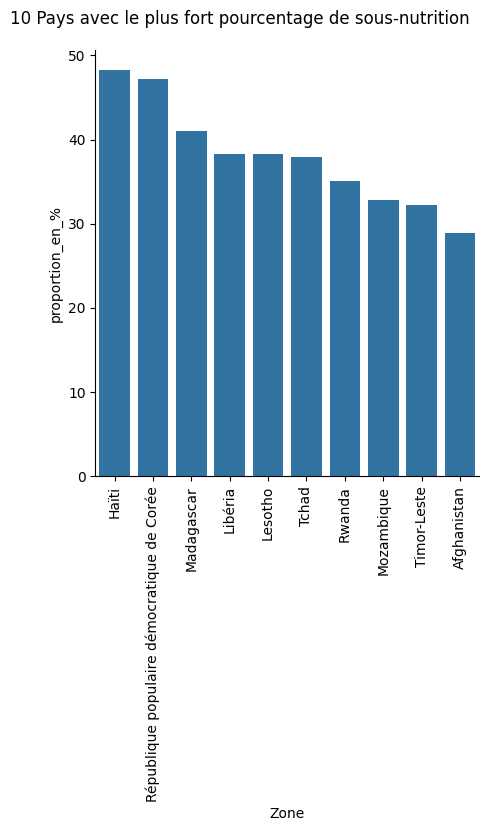

In [73]:
#affichage après trie des 10 pires pays avec GRAPHIQUE
g = sns.catplot(data=top_10, x='Zone', y='proportion_en_%', kind='bar')
g.fig.suptitle("10 Pays avec le plus fort pourcentage de sous-nutrition", y=1.05)
g.set_xticklabels(rotation = 90)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [74]:
#calcul du total de l'aide alimentaire par pays
total_aide_par_pays= aide_alimentaire.groupby("Zone")['Valeur'].sum()
print(total_aide_par_pays)

Zone
Afghanistan     185452000000
Algérie          81114000000
Angola            5014000000
Bangladesh      348188000000
Bhoutan           2666000000
                   ...      
Zambie            3026000000
Zimbabwe         62570000000
Égypte            1122000000
Équateur          1362000000
Éthiopie       1381294000000
Name: Valeur, Length: 76, dtype: int64


In [75]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
top_10_aide = total_aide_par_pays.sort_values(ascending=False).head(10)
print(top_10_aide)

Zone
République arabe syrienne           1858943000000
Éthiopie                            1381294000000
Yémen                               1206484000000
Soudan du Sud                        695248000000
Soudan                               669784000000
Kenya                                552836000000
Bangladesh                           348188000000
Somalie                              292678000000
République démocratique du Congo     288502000000
Niger                                276344000000
Name: Valeur, dtype: int64


In [76]:
#Création de la liste des 10 pays
liste_top_10 = top_10_aide.index
top_10_aide_graph = aide_alimentaire[aide_alimentaire["Zone"].isin(liste_top_10)].copy()
top_10_aide_graph["Zone"] = pd.Categorical(top_10_aide_graph["Zone"], 
                              categories=["Niger","République démocratique du Congo","Somalie" ,"Bangladesh" ,"Kenya" , "Soudan",
                                          "Soudan du Sud", "Yémen","Éthiopie", "République arabe syrienne"],
                              ordered = True)
print(top_10_aide_graph["Zone"].unique())

['Bangladesh', 'Éthiopie', 'Kenya', 'Niger', 'République arabe syrienne', 'République démocratique du Congo', 'Somalie', 'Soudan', 'Soudan du Sud', 'Yémen']
Categories (10, object): ['Niger' < 'République démocratique du Congo' < 'Somalie' < 'Bangladesh' ... 'Soudan du Sud' < 'Yémen' < 'Éthiopie' < 'République arabe syrienne']


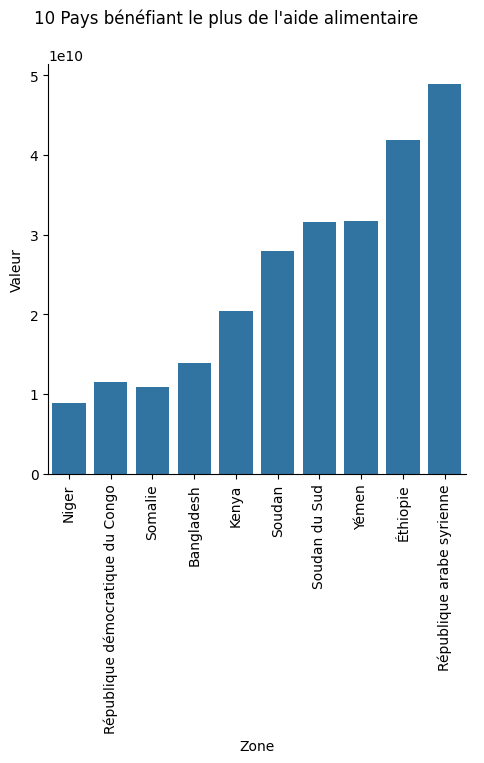

In [77]:
#Affichage en graphique
g = sns.catplot(data=top_10_aide_graph, x="Zone", y='Valeur', kind='bar', errorbar=None)
g.fig.suptitle("10 Pays bénéfiant le plus de l'aide alimentaire", y=1.05)
g.set_xticklabels(rotation = 90)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [78]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
data_aide_evolution = aide_alimentaire[["Zone", 'Année', 'Valeur']].copy()
data_aide_evolution_groupby = data_aide_evolution.groupby(["Zone", 'Année'])['Valeur'].sum()
print(data_aide_evolution_groupby.sort_values(ascending=False).head(20))

Zone                              Année
République arabe syrienne         2014     651870000000
Éthiopie                          2013     591404000000
                                  2014     586624000000
République arabe syrienne         2013     563566000000
                                  2015     524949000000
Yémen                             2016     465574000000
Soudan du Sud                     2014     450610000000
Yémen                             2015     372306000000
Soudan                            2013     330230000000
                                  2014     321904000000
Yémen                             2013     264764000000
Kenya                             2013     220966000000
                                  2014     217418000000
Éthiopie                          2015     203266000000
Soudan du Sud                     2013     196330000000
Bangladesh                        2014     194628000000
République démocratique du Congo  2013     150320000000
Somalie 

In [79]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
Liste_5_pays = liste_top_10[0:5]
top_5_aide_graph = aide_alimentaire[aide_alimentaire["Zone"].isin(Liste_5_pays)].copy()
top_5_aide_graph["Zone"] = pd.Categorical(
    top_5_aide_graph["Zone"],
    categories=Liste_5_pays,
    ordered=True
)
Liste_5_pays = top_5_aide_graph["Zone"].unique()
print(Liste_5_pays)

['Éthiopie', 'République arabe syrienne', 'Soudan', 'Soudan du Sud', 'Yémen']
Categories (5, object): ['République arabe syrienne' < 'Éthiopie' < 'Yémen' < 'Soudan du Sud' < 'Soudan']


In [80]:
len(top_5_aide_graph)

155

In [81]:
#On filtre sur le dataframe avec notre liste
data_aide_evolution = data_aide_evolution[data_aide_evolution["Zone"].isin(Liste_5_pays)]
data_aide_evolution

,Zone,Année,Valeur
354,Éthiopie,2013,170000000
355,Éthiopie,2014,466000000
356,Éthiopie,2015,244000000
357,Éthiopie,2013,181066000000
358,Éthiopie,2014,178646000000
...,...,...,...
1447,Yémen,2015,1797000000
1448,Yémen,2013,161000000
1449,Yémen,2014,81000000
1450,Yémen,2015,7617000000


In [82]:
data_aide_evolution.groupby(["Zone", "Année"])["Valeur"].sum()

Zone                       Année
République arabe syrienne  2013     563566000000
                           2014     651870000000
                           2015     524949000000
                           2016     118558000000
Soudan                     2013     330230000000
                           2014     321904000000
                           2015      17650000000
Soudan du Sud              2013     196330000000
                           2014     450610000000
                           2015      48308000000
Yémen                      2013     264764000000
                           2014     103840000000
                           2015     372306000000
                           2016     465574000000
Éthiopie                   2013     591404000000
                           2014     586624000000
                           2015     203266000000
Name: Valeur, dtype: int64

In [83]:
#Je trie au préalable les dates
data_aide_evolution["Année"] = data_aide_evolution["Année"].sort_values()

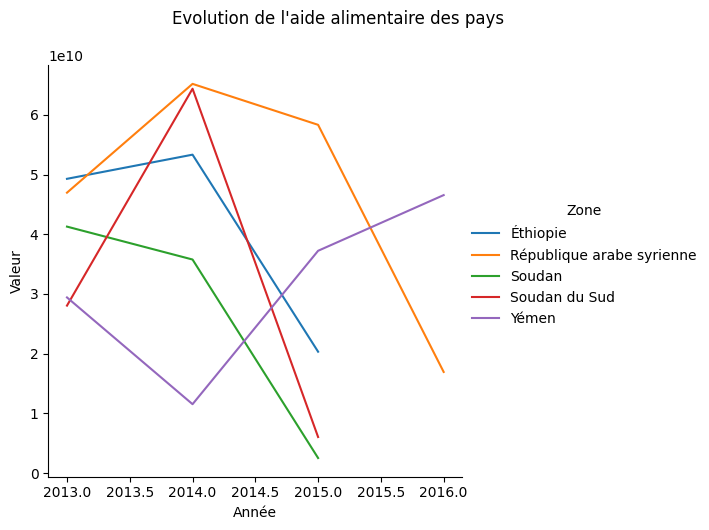

In [84]:
# Affichage des pays avec l'aide alimentaire par année
g = sns.relplot(data=data_aide_evolution, x='Année', y='Valeur', hue="Zone", errorbar=None, kind='line')
g.fig.suptitle("Evolution de l'aide alimentaire des pays", y=1.05)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [85]:
#Calcul de la disponibilité en kcal par personne par jour par pays
#Pour cela j'ajoute une nouvelle colonne au Dataframe
Data_dispo['Disponibilité(Kcal/personne/jour) par_pays'] = Data_dispo.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].transform(lambda x :x.sum())
print(Data_dispo['Disponibilité(Kcal/personne/jour) par_pays'])

0        2087.0
1        2087.0
2        2087.0
3        2087.0
4        2087.0
          ...  
15600    2383.0
15601    2383.0
15602    2383.0
15603    2383.0
15604    2383.0
Name: Disponibilité(Kcal/personne/jour) par_pays, Length: 15605, dtype: float64


In [86]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
Data_dispo.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values().head(10)

Zone
République centrafricaine                     1879.0
Zambie                                        1924.0
Madagascar                                    2056.0
Afghanistan                                   2087.0
Haïti                                         2089.0
République populaire démocratique de Corée    2093.0
Tchad                                         2109.0
Zimbabwe                                      2113.0
Ouganda                                       2126.0
Éthiopie                                      2129.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

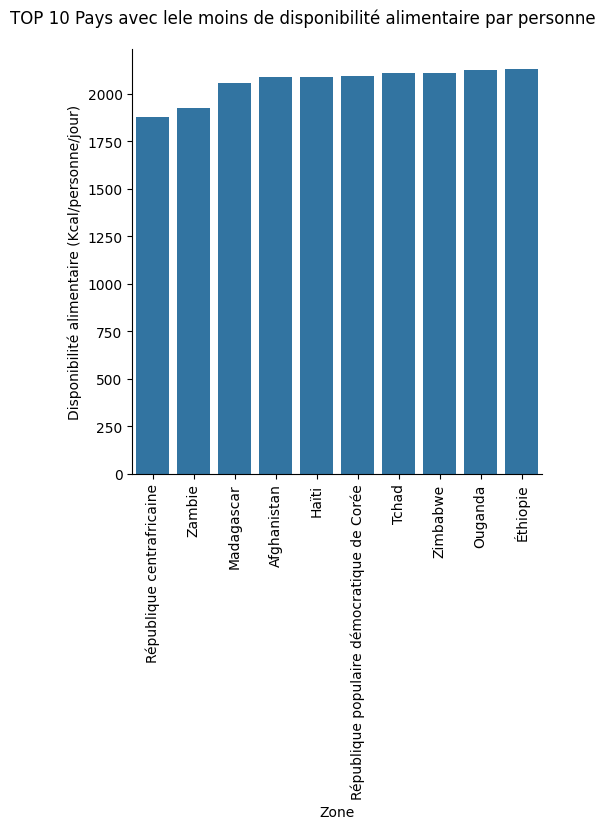

In [87]:
#Graphique des 10 pays qui ont le moins de dispo alimentaire par personne
Serie = Data_dispo.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values().head(10)
top_10_faible_dispo = Serie.reset_index()
g=sns.catplot(data = top_10_faible_dispo, x='Zone', y='Disponibilité alimentaire (Kcal/personne/jour)', kind='bar')
g.fig.suptitle("TOP 10 Pays avec lele moins de disponibilité alimentaire par personne", y=1.05)
g.set_xticklabels(rotation = 90)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [88]:
Data_dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal,Dispo_totale,Disponibilité(Kcal/personne/jour) par_pays
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,181480565.0,53000000.0,2087.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,36296113.0,41000000.0,2087.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,36296113.0,2000000.0,2087.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.0,0.0,2087.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,145184452.0,82000000.0,2087.0


In [89]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
top_10_forte_dispo = Data_dispo.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending = False).head(10)
print(top_10_forte_dispo)

Zone
Autriche                 3770.0
Belgique                 3737.0
Turquie                  3708.0
États-Unis d'Amérique    3682.0
Israël                   3610.0
Irlande                  3602.0
Italie                   3578.0
Luxembourg               3540.0
Égypte                   3518.0
Allemagne                3503.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64


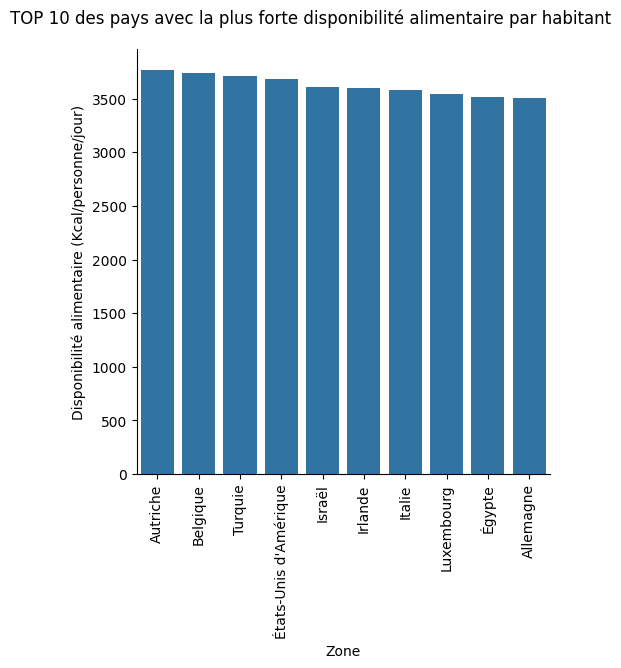

In [90]:
#Graphique des 10 pays qui ont le plus de dispo alimentaire par personne 
top_10_forte_dispo = top_10_forte_dispo.reset_index() 
g = sns.catplot(data=top_10_forte_dispo, x='Zone', y='Disponibilité alimentaire (Kcal/personne/jour)', kind='bar')
g.fig.suptitle("TOP 10 des pays avec la plus forte disponibilité alimentaire par habitant", y=1.05)
g.set_xticklabels(rotation = 90)   
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [91]:
#création d'un dataframe avec uniquement la Thaïlande
#Je cible 2017
Data_dispo_Thailande = Data_dispo[Data_dispo["Zone"] == "Thaïlande"]
Data_Thailande = Data_dispo_Thailande.merge(sous_nutrition_2017, on="Zone", how='left')
Data_Thailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Production,Semences,Traitement,Variation de stock,Population,dispo_kcal,Dispo_totale,Disponibilité(Kcal/personne/jour) par_pays,Année,sous_nutrition
0,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000000.0,...,4.500000e+07,0.0,0.0,0.0,69209810.0,207629430.0,73000000.0,2785.0,2017,6200000.0
1,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000000.0,...,1.200000e+07,0.0,2000000.0,0.0,69209810.0,0.0,8000000.0,2785.0,2017,6200000.0
2,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,0.00,0.00,358000000.0,...,4.470000e+08,0.0,0.0,0.0,69209810.0,0.0,358000000.0,2785.0,2017,6200000.0
3,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000000.0,...,0.000000e+00,0.0,0.0,0.0,69209810.0,138419620.0,12000000.0,2785.0,2017,6200000.0
4,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000000.0,...,2.209000e+09,0.0,0.0,13000000.0,69209810.0,692098100.0,756000000.0,2785.0,2017,6200000.0


In [92]:
#Vérifications des NaN
Data_Thailande.isna().sum()

Zone                                                             0
Produit                                                          0
Origine                                                          0
Aliments pour animaux                                            0
Autres Utilisations                                              0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Pertes                                                           0
Production                                                    

In [93]:
# Vérification des doublons
doublons_Data_Thailande = Data_Thailande[Data_Thailande.duplicated(subset=["Zone", "Produit"], keep=False)]
print(doublons_Data_Thailande)

Empty DataFrame
Columns: [Zone, Produit, Origine, Aliments pour animaux, Autres Utilisations, Disponibilité alimentaire (Kcal/personne/jour), Disponibilité alimentaire en quantité (kg/personne/an), Disponibilité de matière grasse en quantité (g/personne/jour), Disponibilité de protéines en quantité (g/personne/jour), Disponibilité intérieure, Exportations - Quantité, Importations - Quantité, Nourriture, Pertes, Production, Semences, Traitement, Variation de stock, Population, dispo_kcal, Dispo_totale, Disponibilité(Kcal/personne/jour) par_pays, Année, sous_nutrition]
Index: []

[0 rows x 24 columns]


In [94]:
#Calcul de la sous nutrition en Thaïlande
Data_Thailande["sous_nutrition"] / Data_Thailande["Population"] *100

0     8.958268
1     8.958268
2     8.958268
3     8.958268
4     8.958268
        ...   
90    8.958268
91    8.958268
92    8.958268
93    8.958268
94    8.958268
Length: 95, dtype: float64

In [95]:
#Filtrage pour le Manioc
Data_Thailande_manioc= Data_Thailande[Data_Thailande['Produit'] == 'Manioc']
Data_Thailande_manioc["Production"], Data_Thailande_manioc["Exportations - Quantité"]

(50    3.022800e+10
 Name: Production, dtype: float64,
 50    2.521400e+10
 Name: Exportations - Quantité, dtype: float64)

In [96]:
# Affichage de la production de manioc
Data_Thailande_manioc= Data_Thailande[Data_Thailande['Produit'] == 'Manioc']
print("Production de Manioc en kg :", Data_Thailande_manioc["Production"].loc[50])

Production de Manioc en kg : 30228000000.0


In [97]:
# Affichage de l'exportation de manioc
print("Exportation de Manioc en kg :", Data_Thailande_manioc["Exportations - Quantité"].loc[50])

Exportation de Manioc en kg : 25214000000.0


In [98]:
# On calcule la proportion exportée en fonction de la proportion
print("Proportion de manioc exporté :", Data_Thailande_manioc["Exportations - Quantité"].loc[50] /Data_Thailande_manioc["Production"].loc[50] * 100, " %")

Proportion de manioc exporté : 83.41272991928014  %


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [99]:
#ajouter en dessous toutes les analyses complémtaires
#Analyse de l'évolution de l'aide alimentaire de 2013 à 2016

In [107]:
evolution_aide = aide_alimentaire.groupby('Année')['Valeur'].sum()
print(evolution_aide)

Année
2013    4165674000000
2014    3939152000000
2015    2187507000000
2016     743568000000
Name: Valeur, dtype: int64


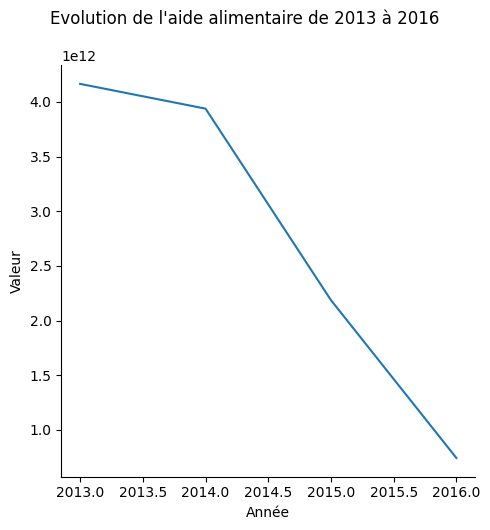

In [106]:
evolution_aide = evolution_aide.reset_index()
g = sns.relplot(data = evolution_aide, x='Année', y ='Valeur', kind='line')
g.fig.suptitle("Evolution de l'aide alimentaire de 2013 à 2016", y=1.05)  
plt.show()